# Project Title: Instagram fake spammer genuine accounts or ( Instagram_fake_Account_Detection ):

## Name Lakshman Chaudhary

**<H3 align:right>DEFINING PROBLEM STATEMENT AND BUSINESS CASE</H3>** 
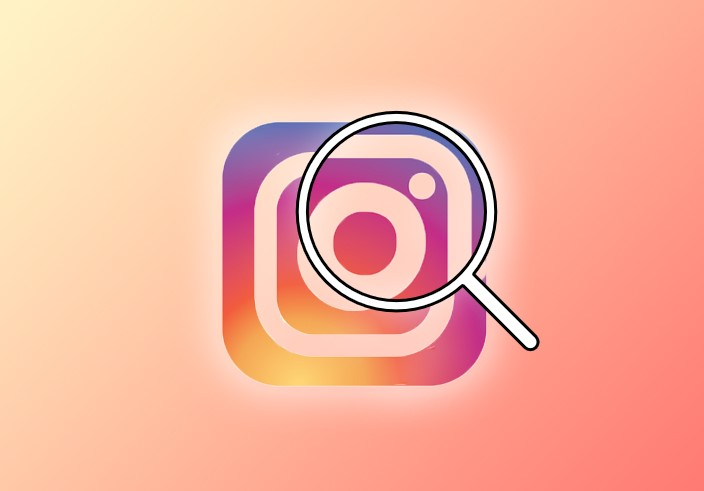



**<H3 align:right>FAKE INSTAGRAM ACOUNT DETECTOR</H3>** 

---
**<h4>UNDERSTANDING THE PROBLEM**



* This project aim is to implement a deep learning model capable of detecting and flagging fake or spam Instagram profiles for improved social media integrity.
*  These days spam accounts have become a major problem in in all the social media platforms.

* Many users are creating fake accounts to create an illusion of having many followers to thier personal accounts.


*  Fake accounts are being created to sell fake products and services. 
*  They are also being used to impersonate other account users from common people to celebrities in order to influence, criticize, hurt feelings and reputation.

<br>

*  There are few key input features which we considered to determine if the account is fake or not.

*   THE *INPUT FEATURES* ARE:


1.   **PROFILE PICTURE** - The user has profile picture or not.
2.   **NUMS/LENGTH USERNAM**E - The ratio of number of numerical chars in username to its length.
3.  **FULLNAME WORDS** - Full name in word tokens
4.   **NAME/LENGTH OF FULL NAME** - The ratio of number of numerical characters in full name to its length.
5.   **NAME == USERNAME** - Are username and full name literally the same?
6.   **DESCRIPTION LENGTH** - Bio length in characters.
7.   **EXTERNAL URL** - Has external URL or not.
8.   **PRIVATE** - Private or not.
9.   **POSTS** - Number of posts.
10.  **FOLLOWERS** - Number of followers.
11.  **FOLLOWS** - Number of follows.


**<h4> TRAINED DETECTOR MODEL:**

---
This model is trained such that it considers the above given features and determines whether a particular account is fake or not. By resulting the output as either 0 or 1 meaning TRUSTED or FAKE respectively. Our intention is to make this software capable of thinking like a human, based on the data it is given and results in maximum probability of success.





**<H3>TASK 1**

---

* **<h2>LOADING LIBRAIRES**











In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
%pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import sys
print(sys.version)


3.12.5 (tags/v3.12.5:ff3bc82, Aug  6 2024, 20:45:27) [MSC v.1940 64 bit (AMD64)]


In [4]:
!pip install tensorflow==2.18.0

# or, %pip install tensorflow==2.18.0

Defaulting to user installation because normal site-packages is not writeable


In [5]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

In [6]:
#styling purpose
!pip install jupyterthemes

Defaulting to user installation because normal site-packages is not writeable


In [7]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

* **<H2>LOADING DATASETS**

---



In [8]:
#Load the training and testing datasets
instagram_df_test = pd.read_csv('test.csv')
instagram_df_train = pd.read_csv('train.csv')

In [9]:
#the dataset which will be used for training purpose (576 records)
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [10]:
#the dataset which will be used for testing purpose (120 records)
instagram_df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


**<H1>TASK 2: <h3>PERFORMING EXPLORATORY DATA ANALYSIS**

---



*   **<h3><i>Performing Exploratory Data Anlaysis For "Training Dataset"**

In [11]:
#Getting dataframe info

instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [12]:
#Statistical summary of the dataframe
instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [13]:
#Check if null values exist
instagram_df_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [14]:
#Number of unique values in the profile pic column
instagram_df_train['profile pic'].value_counts()

profile pic
1    404
0    172
Name: count, dtype: int64

In [15]:
#Number of fake and real accounts
instagram_df_train['fake'].value_counts()

fake
0    288
1    288
Name: count, dtype: int64

In [16]:
#Number of accounts having an external URL
instagram_df_train['external URL'].value_counts()

external URL
0    509
1     67
Name: count, dtype: int64

In [17]:
#Number of accounts having description length over 50
(instagram_df_train['description length'] > 50).sum()

98



*   **<h2><i>Performing Exploratory Data Anlaysis For "Testing Dataset"**



In [18]:
instagram_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [19]:
instagram_df_test.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [20]:
instagram_df_test.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [21]:
instagram_df_test['fake'].value_counts()

fake
0    60
1    60
Name: count, dtype: int64

**<H1>TASK 3**

---


**<h2>PERFROMING DATA VISUALIZATION**

<Axes: ylabel='count'>

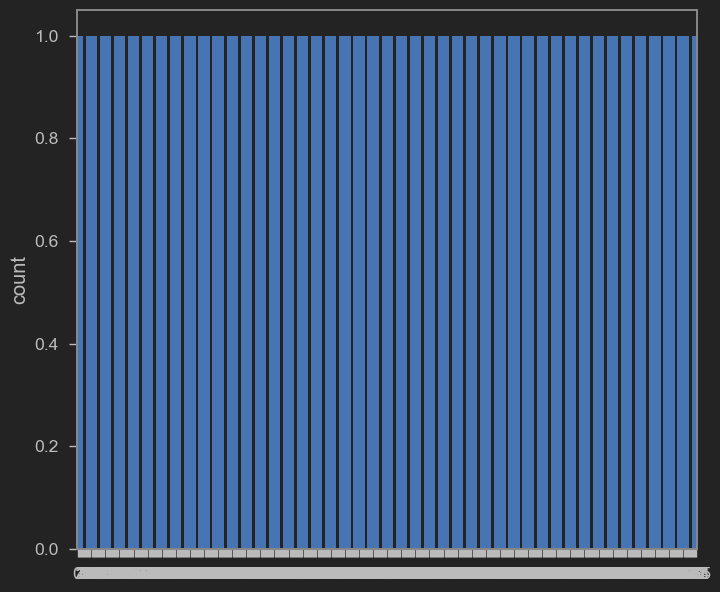

In [22]:
#Vislualizing the number of fake and real accounts (using seaborn library)
sns.countplot(instagram_df_train['fake'])

C:\Users\laksh\AppData\Local\Temp\ipykernel_28732\2746094449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(instagram_df_train['private'],palette = "PuBu")


<Axes: ylabel='count'>

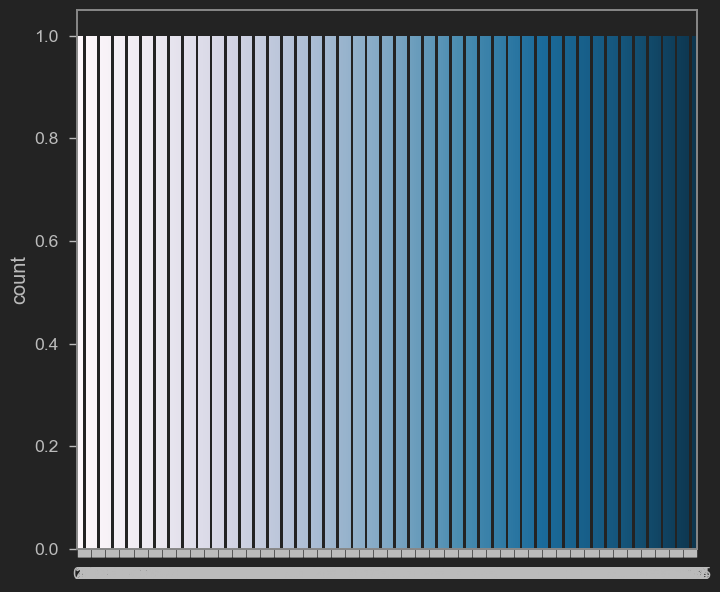

In [23]:
#Visualizing the private column
sns.countplot(instagram_df_train['private'],palette = "PuBu")

C:\Users\laksh\AppData\Local\Temp\ipykernel_28732\2936145885.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(instagram_df_train['profile pic'],palette = "Pastel2")


<Axes: ylabel='count'>

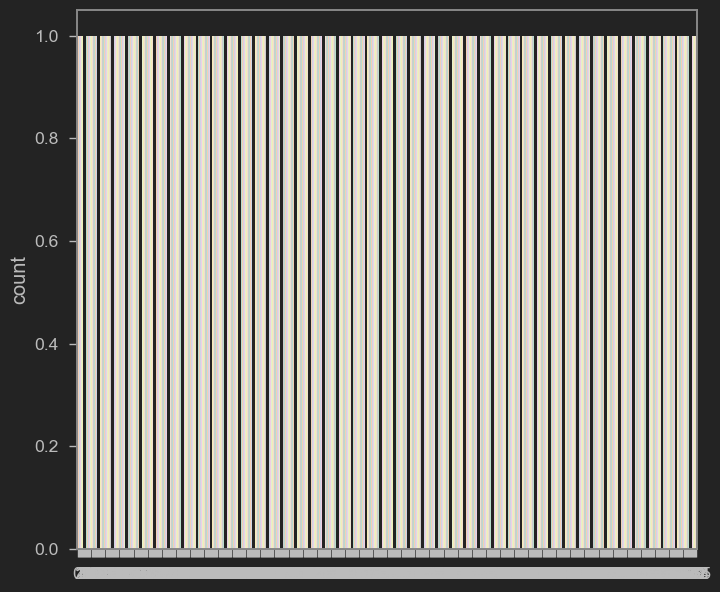

In [24]:
#Visualizing the profile pic feature
sns.countplot(instagram_df_train['profile pic'],palette = "Pastel2")

C:\Users\laksh\AppData\Local\Temp\ipykernel_28732\2810340997.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(instagram_df_train['nums/length username'],kde=True)


<Axes: xlabel='nums/length username', ylabel='Density'>

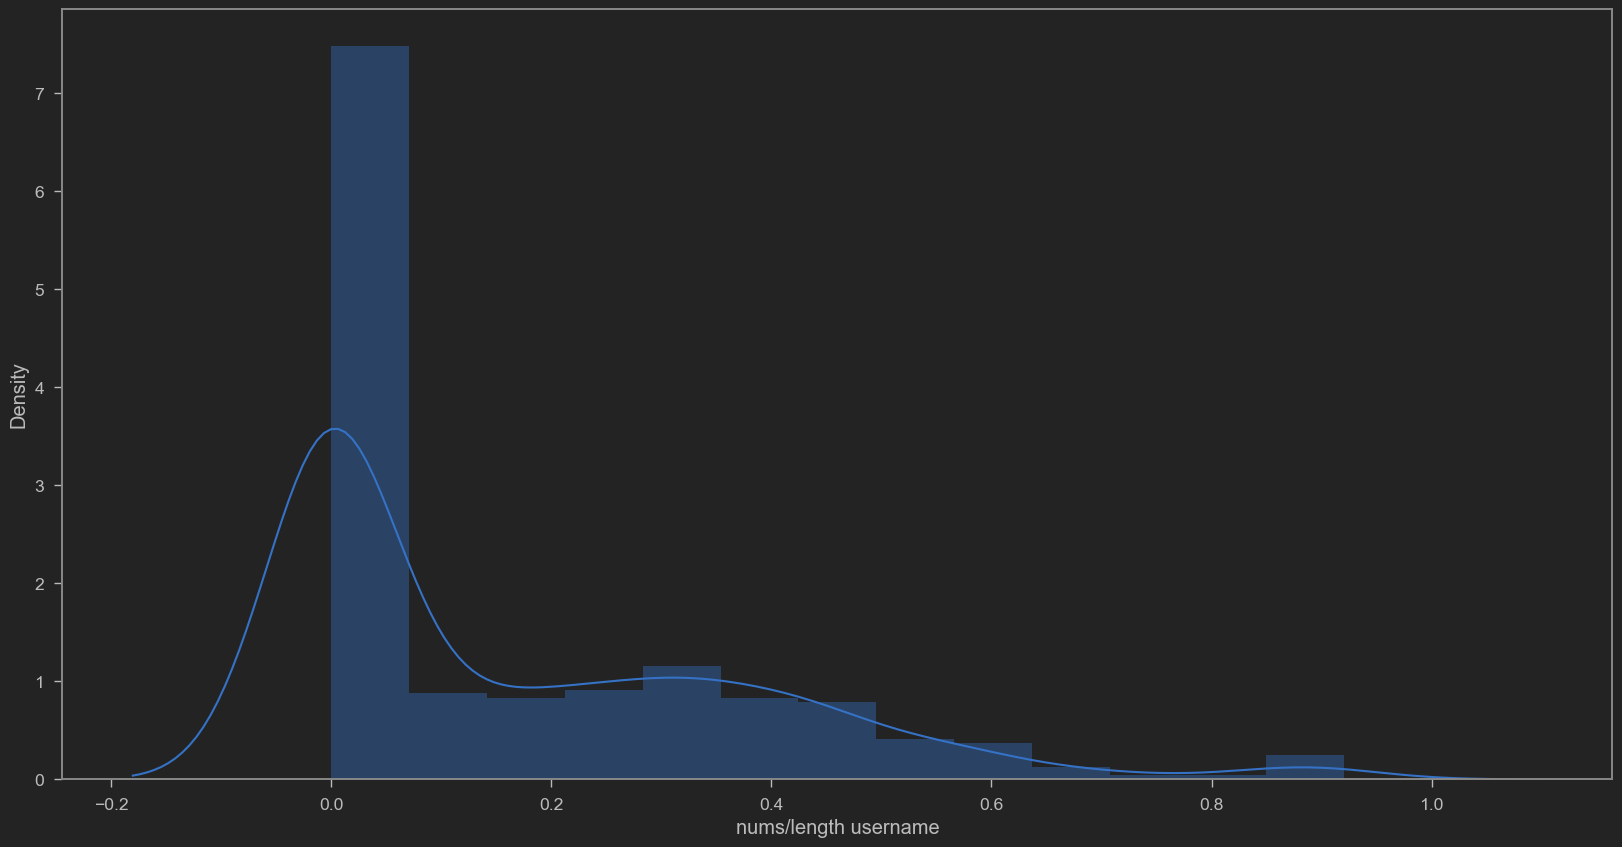

In [25]:
#Visualizing the length of usernames(Histogram)
plt.figure(figsize = (20, 10))
sns.distplot(instagram_df_train['nums/length username'],kde=True)

<Axes: >

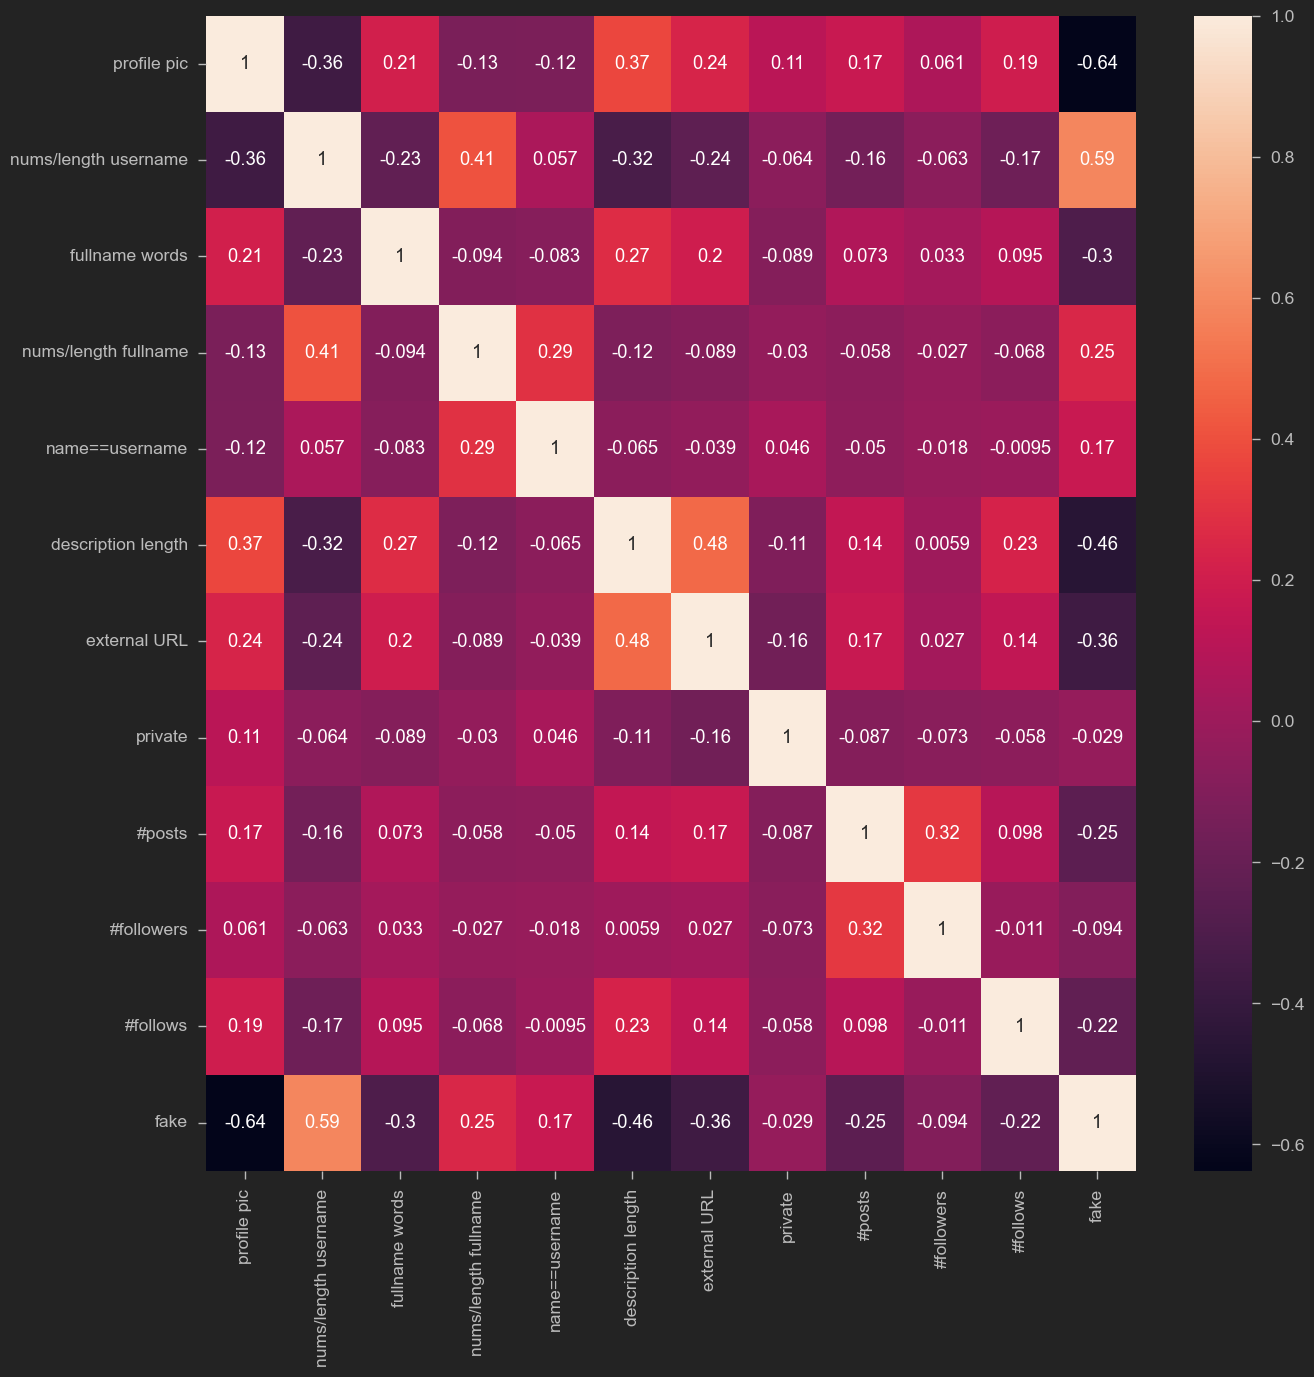

In [26]:
#Correlation heatmap
plt.figure(figsize=(15,15))
cm = instagram_df_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

<Axes: ylabel='count'>

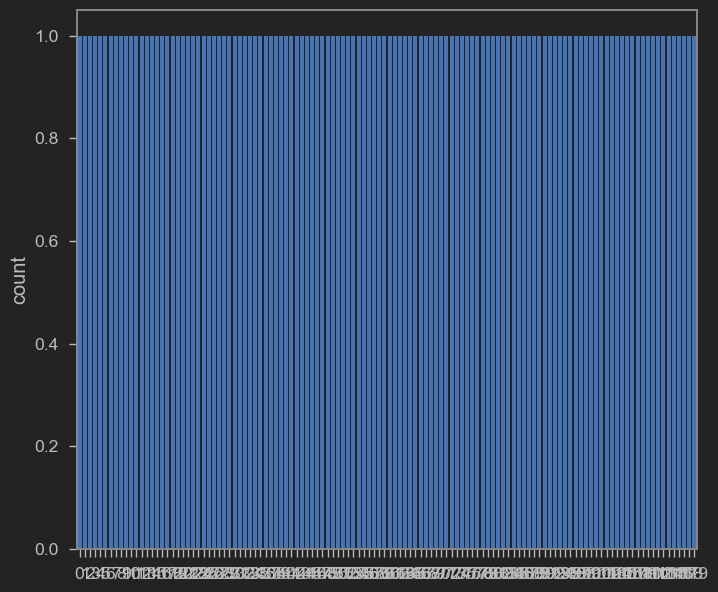

In [27]:
sns.countplot(instagram_df_test['fake'])

C:\Users\laksh\AppData\Local\Temp\ipykernel_28732\1417521828.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(instagram_df_test['private'],palette = "Set2")


<Axes: ylabel='count'>

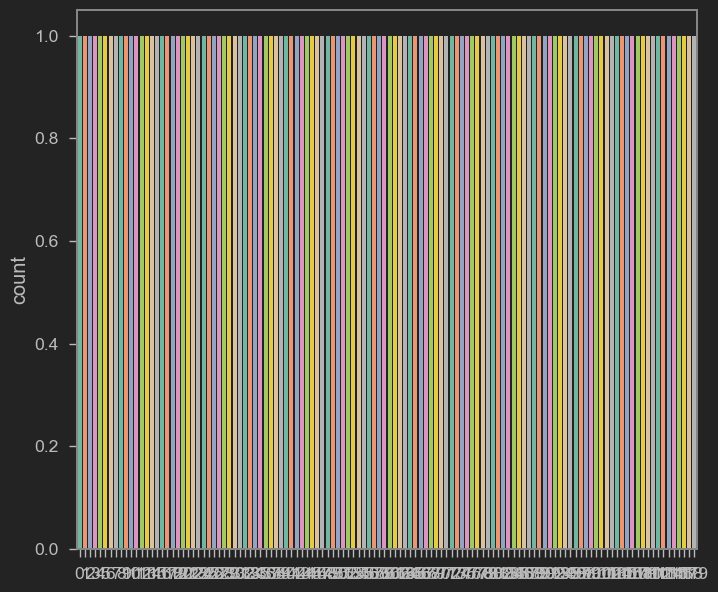

In [28]:
sns.countplot(instagram_df_test['private'],palette = "Set2")

<Axes: ylabel='count'>

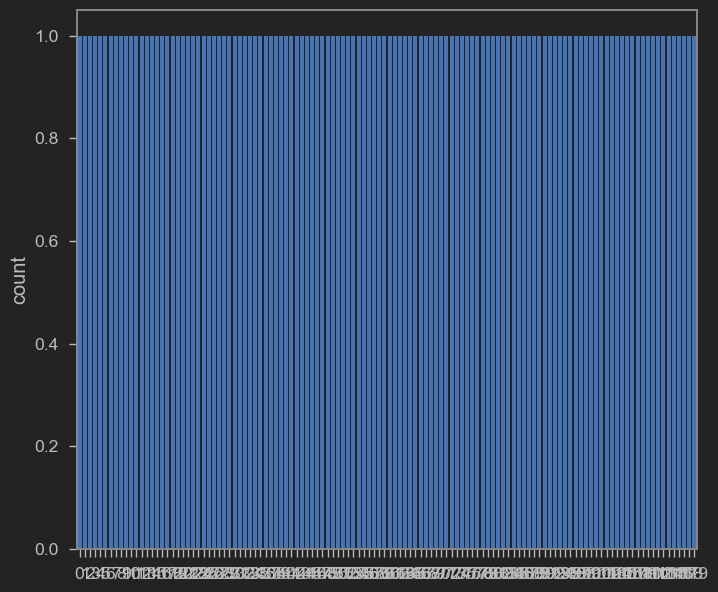

In [29]:
sns.countplot(instagram_df_test['profile pic'])

**<H1>TASK 4**

---

**<h2>PREPARING THE DATA TO FEED THE MODEL**

In [30]:
#Preparing inputs for the model (Dropping the fake column from both training and testing dataset)
x_train = instagram_df_train.drop(columns = ['fake'])
x_test = instagram_df_test.drop(columns = ['fake'])
x_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [31]:
x_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356
...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811
116,1,0.40,1,0.00,0,0,0,0,4,150,164
117,1,0.00,2,0.00,0,0,0,0,3,833,3572
118,0,0.17,1,0.00,0,0,0,0,1,219,1695


In [32]:
#Preparing the outputs (Takin only the fake column into consideration.)
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [33]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [34]:
#Scaling the data before training the model (Normalize the data)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(x_train)
X_test = scaler_x.transform(x_test)

In [35]:
Y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [36]:
#Having a look at the shapes after scaling the data
X_train.shape,X_test.shape

((576, 11), (120, 11))

In [37]:
Y_train.shape,Y_test.shape

((576, 2), (120, 2))

In [38]:
#Percentage of Traininf data
Training_data_percentage = len(X_train)/(len(X_train) + len(X_test) ) * 100
Training_data_percentage


82.75862068965517

In [39]:
Testing_data_percentage = len(X_test)/(len(X_train) + len(X_test) ) * 100
Testing_data_percentage


17.24137931034483

**<H1>TASK 5**

---

 **<H3><i>UNDERSTANDING THEORY AND INTUITION BEHIND NEURAL NETWORKS**

<br>

<H3><center>NEURAL MATHEMATICAL MODEL:</center></i>
<br>

* The neuron collects information from input channels named dendrites, processes information in its nucleus and then generates an output in a long thin branch called Axon.

<br>

<i><center> SINGLE NEURON MODEL: </center> </i> <br>

<center>

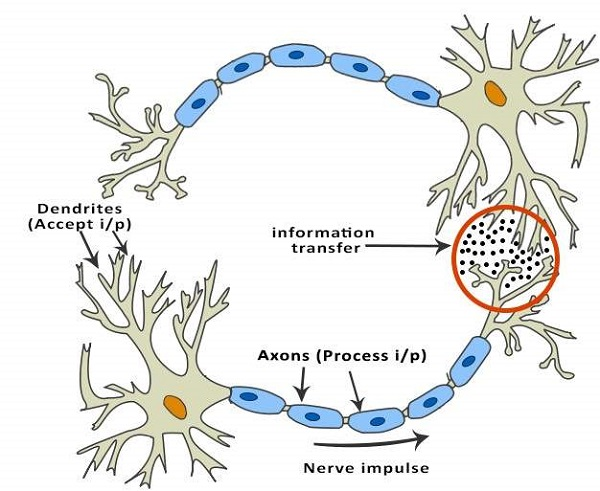

</center>

<h7>credits:https://www.tutorialspoint.com/artificial_intelligence/images/neuron.jpg </h7>


* Consists the three main aspects, that are Dendrites, Nucleus and Axon these are considered as  Independent variables, Processing operations and Activation function respectively. 

* Considering the independent variables as X2,X2,X3.. Xn Operations processor as as some 'P', and activation functions as 'F'.

* Some of the **Activation Functions** are:

<br>

**1.   Sigmoid**


*   Takes a number between 0 and 1
*   Converts large negative numbers to zero and converts large positive numbers to 1 
*   It is generally used as Output Layer. but in  our model, we are using softmax as the ouput layer. 

<br>

**2. Softmax**

* The softmax function is sometimes called the softargmax function, or multi-class logistic regression. This is because the softmax is a generalization of logistic regression that can be used for multi-class classification, and its formula is very similar to the sigmoid function which is used for logistic regression. 

* he softmax is very useful because it converts the scores to a normalized probability distribution, which can be displayed to a user or used as input to other systems. For this reason it is usual to append a softmax function as the final layer of the neural network.

<br>

**3. RELU- Rectified Linear Units**

*  ReLu is a non-linear activation function that is used in multi-layer neural networks or deep neural networks.
*  ReLu function has been used instead to calculate the activation values in traditional neural network or deep neural network paradigms.  
*  ReLu function is able to accelerate the training speed of deep neural networks compared to traditional activation functions since the derivative of ReLu is 1 for a positive input.
* Generally used in Hidden Layers.

<br>

**<h4> EXAMPLE</h4>**

* Assume an example for an activation function of unit step.
* These activation functions are used to map the input between 0 and 1 (0,1).
 
<br>

**<h3> ANN TRAINING PROCESS**

---
*  ANN is rarely used for predictive modelling. The reason being that Artificial Neural Networks (ANN) usually tries to over-fit the relationship. ANN is generally used in cases where what has happened in past is repeated almost exactly in same way.





* **<H3>GRADIENT DESCENT**




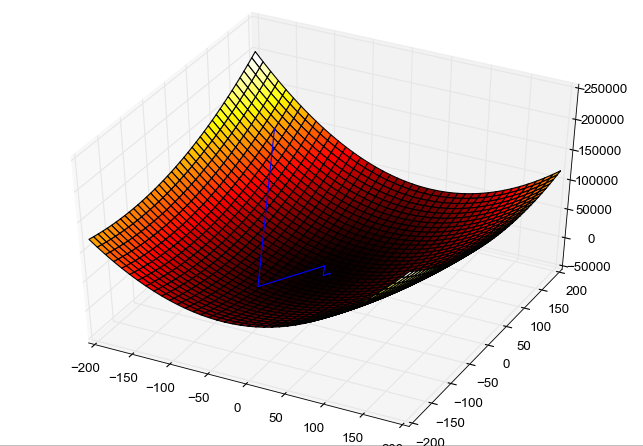



<br>
<br>

<h6>credits:https://miro.medium.com/max/1286/1*DrJAzS7VSKdMCZj4XFKn1Q.png</h6>

<br>

1. Gradient descent is an optimization algorithm used to obtain the optimized network weight and bias values.

2. It works by iteratively trying to minimize the cost function.
3. It works by calculating the gradient of the cost function and negative direction until the local orgloal minimum is achieved.

4. If the postive of the gradient is taken, local or global maximum is achieved.


* **<h3>BACK PROPAGATION**

1. Back propaagtion is used to train ANN's by calculationg gradient needed to update network weigths.

2. It is commonly iused as gradient descent optimizaion algorithm to adgust the weight of neurons by calcl=ulating the gradient of the loss function.

3. <i>PHASE 1:<i>
    
   * Propagation forward through the network to generate the output value(s)
  * Calculation of the cost (error term).
  * Propagation of output actications back through network using training pattern target in order to geerate the deltas (differences between targeted and actual output values).
  
4. <i>PHASE 2:</i>
     * Weight update
     * Calculating weight gradient.
     * This ratio influences the speed and quality of learning also caled as learning rate. The greater the ratio, the faster neuron train, but lower ratio, more accurate the training is.








**<H1>TASK-6**

---

**<h2><I>BUILD A SIMPLE DEEP LEARNING MODEL**


In [40]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

#Building the main model***

model = Sequential() 
model.add(Dense(50,input_dim = 11, activation = "relu")) #Initial Layer
model.add(Dropout(0.3))
model.add(Dense(150, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(25, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(2, activation = "softmax")) #output layer

model.summary()




C:\Users\laksh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 150)                 │           7,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           3,775 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              52 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,077 (47.18 KB)

 Trainable params: 12,077 (47.18 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [42]:
epochs_hist = model.fit(X_train, Y_train, epochs = 20, verbose = 1, validation_split = 0.1)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6147 - loss: 0.6643 - val_accuracy: 0.8448 - val_loss: 0.4751
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8544 - loss: 0.4271 - val_accuracy: 0.9138 - val_loss: 0.2858
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8841 - loss: 0.3539 - val_accuracy: 0.9138 - val_loss: 0.2301
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8853 - loss: 0.3073 - val_accuracy: 0.9310 - val_loss: 0.1876
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9100 - loss: 0.2885 - val_accuracy: 0.9310 - val_loss: 0.1828
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8920 - loss: 0.2642 - val_accuracy: 0.9310 - val_loss: 0.1769
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8763 - loss: 0.3151 - val_accuracy: 0.9310 - val_loss: 0.1495
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8816 - loss: 0.3196 - val_accuracy: 0.9138 - val_lo

**<h2> TASK-7</h2>**

---


**<h2><i>ASSESSING THE PRERFORMANCE OF THE MODEL**

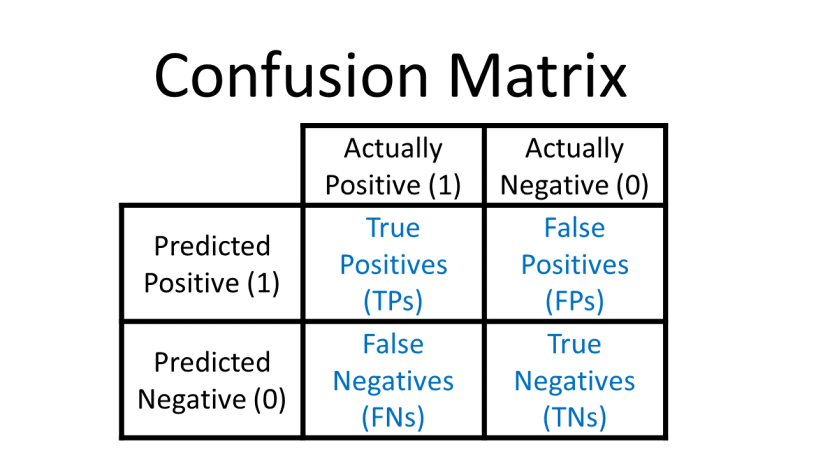

In [43]:
print(epochs_hist.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


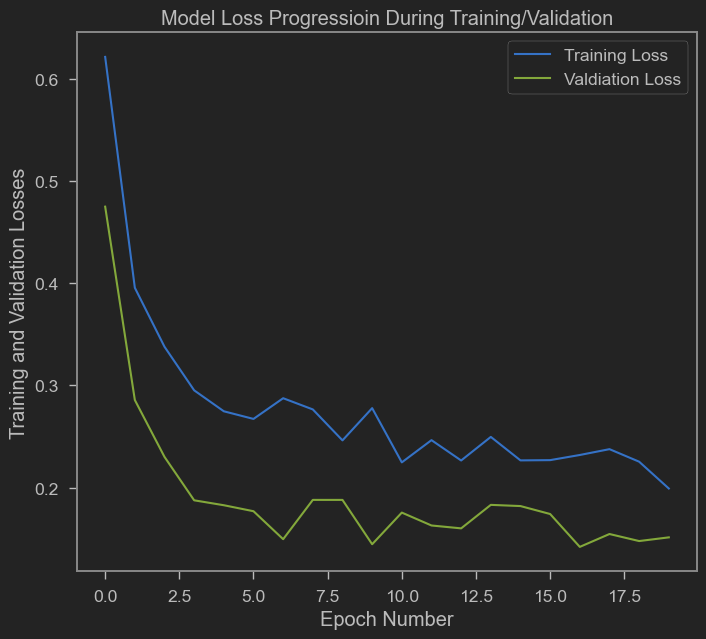

In [44]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progressioin During Training/Validation')
plt.xlabel('Epoch Number')
plt.ylabel('Training and Validation Losses')
plt.legend(['Training Loss','Valdiation Loss'])


In [45]:
predicted = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [46]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in Y_test:
    test.append(np.argmax(i))

In [47]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90        60
           1       0.93      0.85      0.89        60

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



<Axes: >

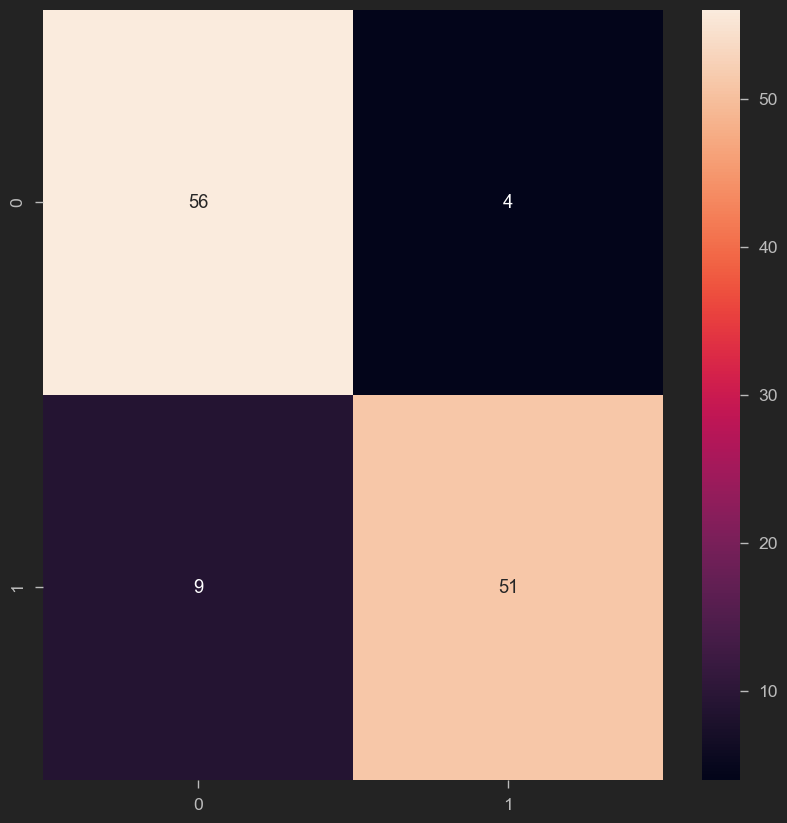

In [48]:
plt.figure(figsize=(10, 10))
con_matrix = confusion_matrix(test,predicted_value)
sns.heatmap(con_matrix, annot=True)

In [49]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load data
instagram_df_train = pd.read_csv('train.csv')
instagram_df_test = pd.read_csv('test.csv')

# Split features and target
X_train = instagram_df_train.drop('fake', axis=1)
y_train = instagram_df_train['fake']

X_test = instagram_df_test.drop('fake', axis=1)
y_test = instagram_df_test['fake']

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.925


In [50]:
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))


Training Accuracy: 100.00%
Testing Accuracy: 92.50%


<h2>INFERENCES AND CONCLUSION:</h2>

<i>

* Thus, we have analyzed the dataset and obtained a fairly accurate predictive model using Neural Networks.

* The model is hence trained to detect fake accounts in Instagram based on the considered features.

* We achieved <b>92.50% testing accuracy</b> in detecting fake accounts by training the model using datasets from <code>train.csv</code>. We evaluated the model's performance on unseen data using <code>test.csv</code>, which contained details of 120 Instagram accounts.

* Out of these, the model correctly predicted <b>107</b> accounts and misclassified <b>13</b>, showcasing its effectiveness in identifying fake profiles based on attributes such as profile picture, username length, description length, number of followers, follows, posts, and account privacy.

</i>
